<a href="https://colab.research.google.com/github/FajarWahyuSuryaputra/Pembelajaran_Mesin/blob/main/TesorflowKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reggression Keras Tensorflow

In [34]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [35]:
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [36]:
from sklearn import preprocessing
df_scaled= preprocessing.normalize(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,0.395564,0.000000,0.0,0.118669,0.001831,0.761826,0.495187,0.020511,0.058595
1,0.392536,0.000000,0.0,0.117761,0.001817,0.766900,0.491397,0.020354,0.044989
2,0.273422,0.117181,0.0,0.187489,0.000000,0.766403,0.488458,0.222027,0.033115
3,0.268004,0.114859,0.0,0.183774,0.000000,0.751218,0.478781,0.294200,0.033087
4,0.145460,0.096973,0.0,0.140626,0.000000,0.716605,0.604618,0.263673,0.032446


In [37]:
y = df_scaled['Strength']
X = df_scaled.drop('Strength', axis=1)

In [41]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
X_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
196,0.140864,0.000000,0.072711,0.119810,0.005426,0.728124,0.655413,0.020258
631,0.236848,0.000000,0.000000,0.134093,0.000000,0.774676,0.570622,0.005101
81,0.246469,0.164287,0.000000,0.120374,0.011056,0.658772,0.680651,0.002319
526,0.275139,0.014562,0.108063,0.118026,0.008354,0.721952,0.613889,0.002299
830,0.138411,0.162334,0.126450,0.152936,0.016233,0.715978,0.633102,0.023923
...,...,...,...,...,...,...,...,...
87,0.213446,0.149777,0.000000,0.107878,0.008350,0.748961,0.599184,0.002237
330,0.178029,0.000000,0.090241,0.103370,0.008656,0.783964,0.577730,0.010099
466,0.138300,0.000000,0.090989,0.121076,0.007195,0.784162,0.580600,0.072675
121,0.373786,0.093486,0.000000,0.142511,0.007004,0.670533,0.614977,0.022034


In [43]:
model = Sequential()
model.add(Dense(400, input_dim=8,kernel_initializer='normal', activation='relu'))
model.add(Dense(130,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 400)            │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 130)            │        52,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           131 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,861 (218.21 KB)

 Trainable params: 55,861 (218.21 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(hidden_layer_sizes=(400, 130),
                             activation='relu',
                             solver='adam',
                             random_state=42,
                             max_iter=1000)

mlp_regressor.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(400, 130), max_iter=1000, random_state=42)

In [50]:
model.compile(loss='mse', optimizer=optimizers.Adam(0.000001), metrics=['mse','mae'])

history = model.fit(X_train, y_train, epochs=50, batch_size=10,  verbose=1, validation_split=0.2)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.7345e-04 - mae: 0.0110 - mse: 1.7345e-04 - val_loss: 1.4904e-04 - val_mae: 0.0100 - val_mse: 1.4904e-04
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5489e-04 - mae: 0.0100 - mse: 1.5489e-04 - val_loss: 1.4437e-04 - val_mae: 0.0099 - val_mse: 1.4437e-04
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4989e-04 - mae: 0.0099 - mse: 1.4989e-04 - val_loss: 1.4131e-04 - val_mae: 0.0098 - val_mse: 1.4131e-04
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4411e-04 - mae: 0.0096 - mse: 1.4411e-04 - val_loss: 1.3816e-04 - val_mae: 0.0097 - val_mse: 1.3816e-04
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4018e-04 - mae: 0.0095 - mse: 1.4018e-04 - val_loss: 1.3547e-04 - val_mae: 0.0096 - val_mse: 1.3547e-04
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3556e-04 - mae: 0.0093 - mse: 1.3556e-04 - val_loss: 1.3246e-04 - val_mae: 0.0095 - val_mse: 1.3246e-04
Epoch 7/50
58/58

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


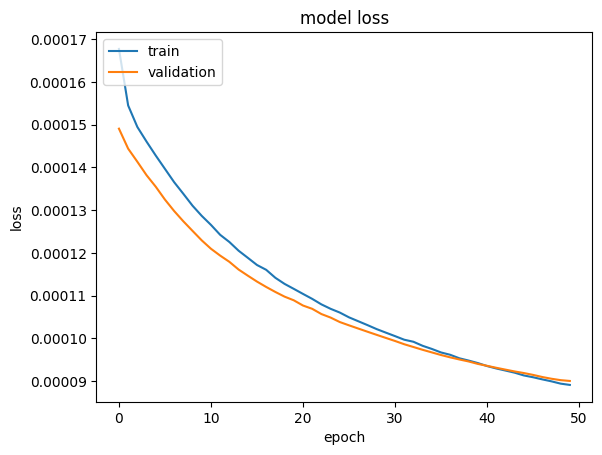

In [51]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [52]:
y_pred=model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [53]:
evaluate = model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9872e-05 - mae: 0.0078 - mse: 8.9872e-05 


Classification Keras Tensorflow

In [54]:
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing, model_selection
import numpy as np
import pandas as pd

In [55]:
df = pd.read_csv("6 class csv.csv")

In [56]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [57]:
df.tail()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
235,38940,374830.0,1356.0,-9.93,5,Blue,O
236,30839,834042.0,1194.0,-10.63,5,Blue,O
237,8829,537493.0,1423.0,-10.73,5,White,A
238,9235,404940.0,1112.0,-11.23,5,White,A
239,37882,294903.0,1783.0,-7.80,5,Blue,O


In [58]:
df.isnull().values.any()

np.False_

In [59]:
df = df.drop(columns=['Star color', 'Spectral Class'])

In [60]:
df.corr()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


([<matplotlib.axis.YTick at 0x783e1469e150>,
 [Text(0, 0, 'Temperature (K)'),
  Text(0, 1, 'Luminosity(L/Lo)'),
  Text(0, 2, 'Radius(R/Ro)'),
  Text(0, 3, 'Absolute magnitude(Mv)'),
  Text(0, 4, 'Star type')])

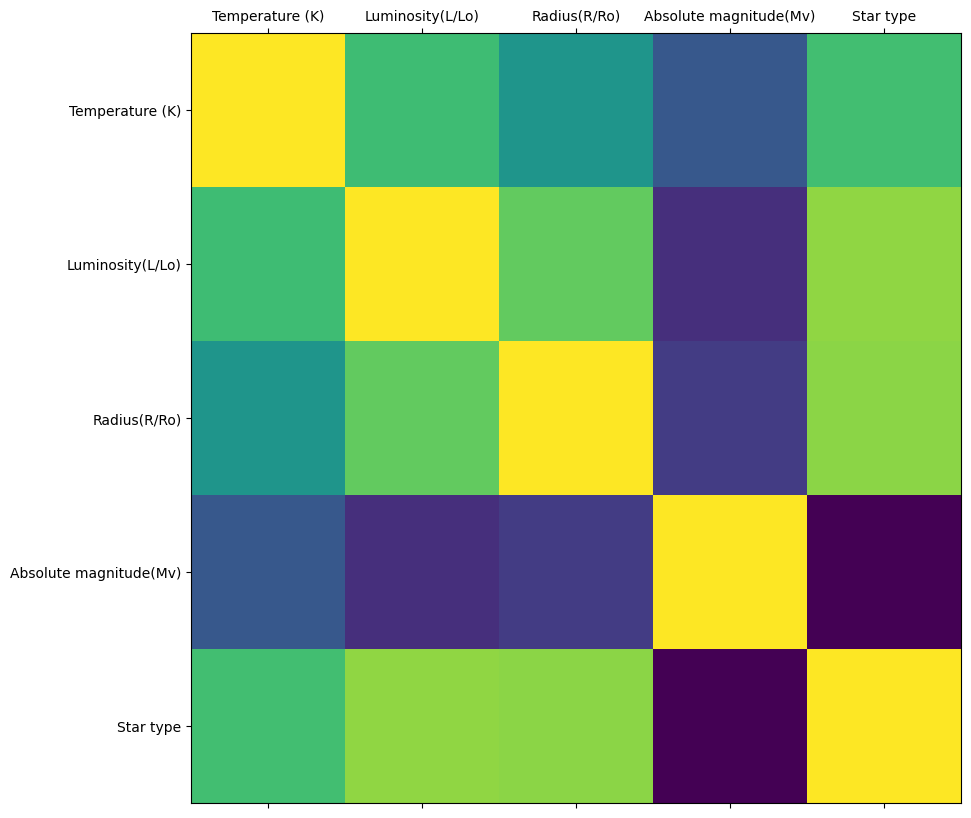

In [62]:
import matplotlib.pyplot as plt

corr = df.corr()
fig,ax = plt.subplots(figsize = (10,10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)

In [63]:
brown_dwarf = len(df.loc[df['Star type'] == 0])
red_dwarf = len(df.loc[df['Star type'] == 1])
white_dwarf = len(df.loc[df['Star type'] == 2])
main_sequence = len(df.loc[df['Star type'] == 3])
supergiant = len(df.loc[df['Star type'] == 4])
hypergiant = len(df.loc[df['Star type'] == 5])

print('Brown Dwarf: {}'.format(brown_dwarf))
print('Red Dwarf: {}'.format(red_dwarf))
print('White Dwarf: {}'.format(white_dwarf))
print('Main Sequence: {}'.format(main_sequence))
print('Supergiant: {}'.format(supergiant))
print('Hypergiant: {}'.format(hypergiant))
print("Total bintang dalam dataset = {}".format(len(df)))

Brown Dwarf: 40
Red Dwarf: 40
White Dwarf: 40
Main Sequence: 40
Supergiant: 40
Hypergiant: 40
Total bintang dalam dataset = 240


In [64]:
x = np.array(df.drop(columns = ['Star type']))
y = np.array(df['Star type'], dtype ='float')
y.shape = (len(y),1)

In [65]:
x_train ,x_test , y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.3)

In [66]:
x_f_train = preprocessing.scale(x_train)
x_f_test = preprocessing.scale(x_test)
y_f_train = y_train
y_f_test = y_test

In [67]:
# prompt: use mlp as model

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=x_f_train.shape[1:]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(6, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(x_f_train, y_f_train, epochs=200)


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2256 - loss: 1.7159  
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3050 - loss: 1.6799 
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2812 - loss: 1.6512  
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4478 - loss: 1.6243 
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5832 - loss: 1.6120 
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6068 - loss: 1.5706 
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6616 - loss: 1.5313  
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6321 - loss: 1.5157  
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6480 - loss: 1.5056 
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6859 - loss: 1.4761 
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6973 - loss: 1.4384 
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6663 - loss: 1.432

In [68]:
val_loss,val_acc = model.evaluate(x_f_test,y_f_test)
print("Loss % = {} , Accuracy % = {} ".format(val_loss*100,val_acc*100))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9627 - loss: 0.3164 
Loss % = 31.55469000339508 , Accuracy % = 97.22222089767456 


In [69]:
arr = np.array([[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1]])

In [70]:
z = np.round(model.predict(x_f_test))

print('_____________________________________________________')
print("Prediction : P-Class : O-Class ")

c1=c2=c3=c4=c5=c6=c7=c8=c9=c10=c11=c12=0  #counter variables

for i in range(0,len(z)):
    if np.array_equal(z[i],arr[0]):
        print("{}  :  {} :  {}".format(z[i],0,y_test[i]))
        c1+=1
    elif np.array_equal(z[i],arr[1]):
        print("{}  :  {} :  {}".format(z[i],1,y_test[i]))
        c2+=1
    elif np.array_equal(z[i],arr[2]):
        print("{}  :  {} :  {}".format(z[i],2,y_test[i]))
        c3+=1
    elif np.array_equal(z[i],arr[3]):
        print("{}  :  {} :  {}".format(z[i],3,y_test[i]))
        c4+=1
    elif np.array_equal(z[i],arr[4]):
        print("{}  :  {} :  {}".format(z[i],4,y_test[i]))
        c5+=1
    elif np.array_equal(z[i],arr[5]):
        print("{}  :  {} :  {}".format(z[i],5,y_test[i]))
        c6+=1

print('_____________________________________________________')
print("Predicted NO. of Brown Dwarfs = {}".format(c1))
print("Predicted NO. of Red Dwarfs = {}".format(c2))
print("Predicted NO. of White Dwarfs = {}".format(c3))
print("Predicted NO. of Main Sequence stars = {}".format(c4))
print("Predicted NO. of Supergiants = {}".format(c5))
print("Predicted NO. of Hypergiants = {}".format(c6))
print("Total tested stars = {}".format(len(z)))

m = y_test

print('_____________________________________________________')

for i in range(0,len(m)):
    if m[i] == 0:
        c7+=1
    elif m[i] == 1 :
        c8+=1
    elif m[i] == 2 :
        c9+=1
    elif m[i] == 3 :
        c10+=1
    elif m[i] == 4 :
        c11+=1
    elif m[i] == 5 :
        c12+=1


print("Original NO. of Brown Dwarfs = {}".format(c7))
print("Original NO. of Red Dwarfs = {}".format(c8))
print("Original NO. of White Dwarfs = {}".format(c9))
print("Original NO. of Main Sequence stars = {}".format(c10))
print("Original NO. of Supergiants = {}".format(c11))
print("Original NO. of Hypergiants = {}".format(c12))
print("Total tested stars = {}".format(len(x_test)))

print('_____________________________________________________')
print('Accuracy = {}%'.format((val_acc*100)))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
_____________________________________________________
Prediction : P-Class : O-Class 
[0. 0. 1. 0. 0. 0.]  :  2 :  [2.]
[0. 0. 0. 0. 0. 1.]  :  5 :  [5.]
[0. 0. 0. 1. 0. 0.]  :  3 :  [3.]
[1. 0. 0. 0. 0. 0.]  :  0 :  [0.]
[0. 1. 0. 0. 0. 0.]  :  1 :  [1.]
[0. 1. 0. 0. 0. 0.]  :  1 :  [1.]
[0. 0. 0. 0. 1. 0.]  :  4 :  [4.]
[0. 0. 0. 0. 0. 1.]  :  5 :  [5.]
[0. 1. 0. 0. 0. 0.]  :  1 :  [1.]
[0. 0. 0. 0. 1. 0.]  :  4 :  [4.]
[0. 1. 0. 0. 0. 0.]  :  1 :  [1.]
[1. 0. 0. 0. 0. 0.]  :  0 :  [0.]
[0. 0. 0. 1. 0. 0.]  :  3 :  [3.]
[1. 0. 0. 0. 0. 0.]  :  0 :  [0.]
[0. 1. 0. 0. 0. 0.]  :  1 :  [1.]
[0. 0. 0. 1. 0. 0.]  :  3 :  [3.]
[0. 0. 0. 1. 0. 0.]  :  3 :  [3.]
[0. 0. 1. 0. 0. 0.]  :  2 :  [2.]
[0. 0. 1. 0. 0. 0.]  :  2 :  [2.]
[0. 1. 0. 0. 0. 0.]  :  1 :  [0.]
[1. 0. 0. 0. 0. 0.]  :  0 :  [0.]
[0. 0. 0. 0. 0. 1.]  :  5 :  [5.]
[0. 0. 0. 0. 1. 0.]  :  4 :  [4.]
[0. 1. 0. 0. 0. 0.]  :  1 :  [1.]
[0. 0. 0. 0. 1. 0.]  :  4 :  [4.]
[0. 0. 1. 0. 0. 0.]  :  2 

Total Counted Stars = 240


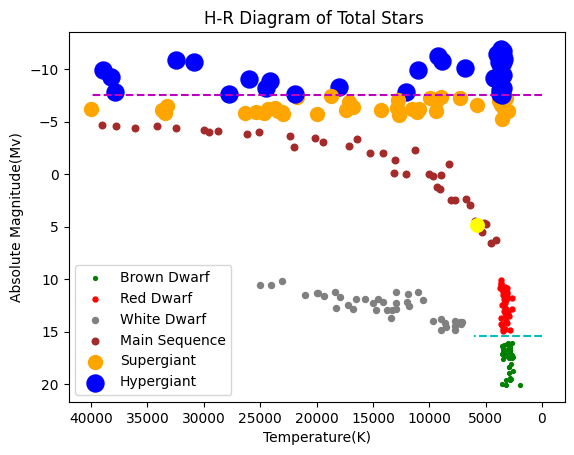

In [71]:
df1 = pd.read_csv('6 class csv.csv')



x1 = np.array(df1.drop(columns = ['Star color','Spectral Class']))
y1 = np.array(df1['Star type'], dtype ='float')
y1.shape = (len(y1),1)
c1 =0

for i in range(0,len(x1)):
    if x1[i][4] == 0:
        a = plt.scatter(x1[i][0],x1[i][3], s = 30 , c = 'green', marker = '.')
    elif x1[i][4]== 1:
        b = plt.scatter(x1[i][0],x1[i][3],s = 50 , c = 'red',marker = '.')
    elif x1[i][4]== 2:
        c = plt.scatter(x1[i][0],x1[i][3],s = 75 , c = 'gray',marker = '.')
    elif x1[i][4]== 3:
        d = plt.scatter(x1[i][0],x1[i][3],s = 90 , c = 'brown',marker = '.')
    elif x1[i][4]== 4:
        e = plt.scatter(x1[i][0],x1[i][3],s = 100 , c = 'orange',marker = 'o')
    elif x1[i][4]== 5:
        f = plt.scatter(x1[i][0],x1[i][3],s = 150 , c = 'blue',marker = 'o')


    c1+=1


print("Total Counted Stars = {}".format(c1))
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Magnitude(Mv)")
plt.title("H-R Diagram of Total Stars ")
plt.legend((a,b,c,d,e,f),('Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.scatter(5778,4.83,s = 95, c= 'yellow',marker = 'o' )
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

Total Trained Stars = 168


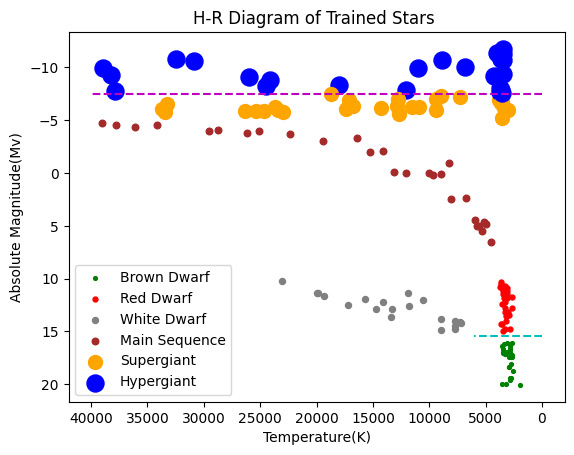

In [72]:
c2=0

for i in range(0,len(y_train)):
    if y_train[i] == 0:
        a = plt.scatter(x_train[i][0],x_train[i][3], s = 30 , c = 'green', marker = '.')
    elif y_train[i]== 1:
        b = plt.scatter(x_train[i][0],x_train[i][3],s = 50 , c = 'red',marker = '.')
    elif y_train[i]== 2:
        c = plt.scatter(x_train[i][0],x_train[i][3],s = 75 , c = 'gray',marker = '.')
    elif y_train[i]== 3:
        d = plt.scatter(x_train[i][0],x_train[i][3],s = 90 , c = 'brown',marker = '.')
    elif y_train[i]== 4:
        e = plt.scatter(x_train[i][0],x_train[i][3],s = 100 , c = 'orange',marker = 'o')
    elif y_train[i]== 5:
        f = plt.scatter(x_train[i][0],x_train[i][3],s = 150 , c = 'blue',marker = 'o')
    c2+=1


print("Total Trained Stars = {}".format(c2))
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Magnitude(Mv)")
plt.title("H-R Diagram of Trained Stars ")
plt.legend((a,b,c,d,e,f),('Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

Total Tested Stars = 72


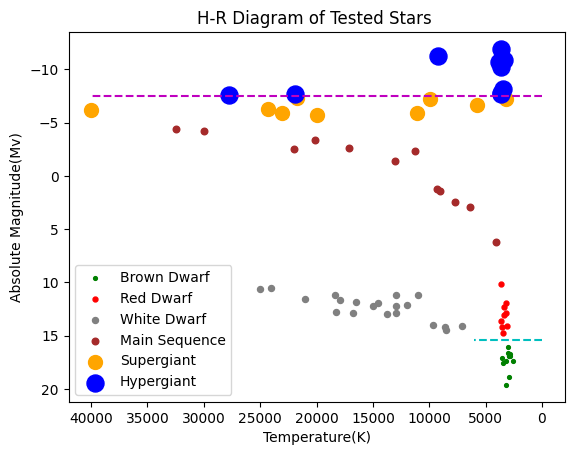

In [73]:
c3=0

for i in range(0,len(y_test)):
    if y_test[i] == 0:
        a = plt.scatter(x_test[i][0],x_test[i][3], s = 30 , c = 'green', marker = '.')
    elif y_test[i]== 1:
        b = plt.scatter(x_test[i][0],x_test[i][3],s = 50 , c = 'red',marker = '.')
    elif y_test[i]== 2:
        c = plt.scatter(x_test[i][0],x_test[i][3],s = 75 , c = 'gray',marker = '.')
    elif y_test[i]== 3:
        d = plt.scatter(x_test[i][0],x_test[i][3],s = 90 , c = 'brown',marker = '.')
    elif y_test[i]== 4:
        e = plt.scatter(x_test[i][0],x_test[i][3],s = 100 , c = 'orange',marker = 'o')
    elif y_test[i]== 5:
        f = plt.scatter(x_test[i][0],x_test[i][3],s = 150 , c = 'blue',marker = 'o')
    c3+=1


print("Total Tested Stars = {}".format(c3))
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Magnitude(Mv)")
plt.title("H-R Diagram of Tested Stars ")
plt.legend((a,b,c,d,e,f),('Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

Total Predicted Stars = 72


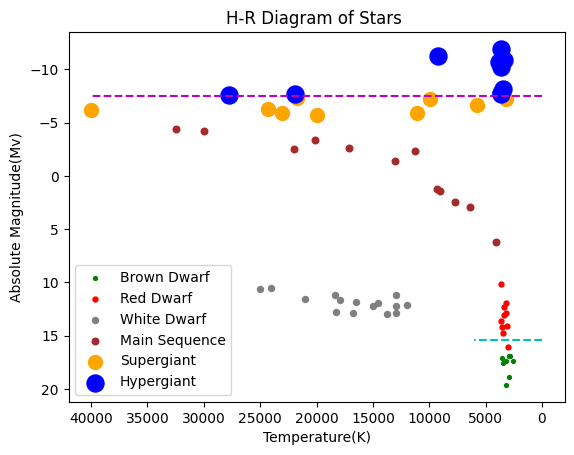

Accuracy = 97.22222089767456 %


In [74]:
c4 = 0

for i in range(0,len(z)):
    if np.array_equal(z[i],arr[0]):
        a = plt.scatter(x_test[i][0],x_test[i][3], s = 30 , c = 'green', marker = '.')
    elif np.array_equal(z[i],arr[1]):
        b = plt.scatter(x_test[i][0],x_test[i][3],s = 50 , c = 'red',marker = '.')
    elif np.array_equal(z[i],arr[2]):
        c = plt.scatter(x_test[i][0],x_test[i][3],s = 75 , c = 'gray',marker = '.')
    elif np.array_equal(z[i],arr[3]):
        d = plt.scatter(x_test[i][0],x_test[i][3],s = 90 , c = 'brown',marker = '.')
    elif np.array_equal(z[i],arr[4]):
        e = plt.scatter(x_test[i][0],x_test[i][3],s = 100 , c = 'orange',marker = 'o')
    elif np.array_equal(z[i],arr[5]):
        f = plt.scatter(x_test[i][0],x_test[i][3],s = 150 , c = 'blue',marker = 'o')
    c4+=1

print("Total Predicted Stars = {}".format(c4))
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Magnitude(Mv)")
plt.title("H-R Diagram of Stars ")
plt.legend((a,b,c,d,e,f),('Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()
print("Accuracy = {} %".format(val_acc*100))